In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix


from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets("data/MNIST/", one_hot=True)


data.test.cls = np.array([label.argmax() for label in data.test.labels])

img_size = 28
img_size_flat = img_size*img_size
img_shape = (img_size,img_size)
num_classes = 10

# Image plotter
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()
    

# Get the first images from the test-set.
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)


# TensorFlow work ##########################

# Holds the images that are input to the Tensorflow graph
x = tf.placeholder(tf.float32, [None, img_size_flat])

# Holds the true labels associated with the images that were input in the placeholder variable x
y_true = tf.placeholder(tf.float32, [None, num_classes])

# Holds the the true class of each image in the placeholder variable x
y_true_cls = tf.placeholder(tf.int64, [None])


# Holds the weights 
weights = tf.Variable(tf.zeros([img_size_flat, num_classes]))


# Holds the biases
biases = tf.Variable(tf.zeros([num_classes]))

#  Model: This simple mathematical model multiplies the images in the placeholder variable x with the weights and then adds the biases.
logits = tf.matmul(x, weights) + biases

# Normalizing logits
y_pred = tf.nn.softmax(logits)

# Index of largest element in each row of y_pred:
y_pred_cls = tf.argmax(y_pred, axis=1)

# Cross Entropy
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                        labels=y_true)

# Average cross entropy of all images as a scalar value
cost = tf.reduce_mean(cross_entropy)

# Optimizes the model by minimizing cross entropy
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1).minimize(cost)

# Few more performance measures ##########################

# Boolean vector whether the predicted class equals the true class of each image
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

# This calculates the classification accuracy by first type-casting the vector 
# of booleans to floats, so that False becomes 0 and True becomes 1, and then
#  calculating the average of these numbers.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Creating a TensorFlow Session
session = tf.Session()

# Initializing the variables- weights and biases
session.run(tf.global_variables_initializer())

# Using Batch Gradient Descent
batch_size = 100

# Function to gradually improve weights and biases with each optimization iteration
def optimize(num_iterations):
    for i in range(num_iterations):
        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(batch_size)
        
        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        # Note that the placeholder for y_true_cls is not set
        # because it is not used during training.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)



feed_dict_test = {x: data.test.images,
                  y_true: data.test.labels,
                  y_true_cls: data.test.cls}

def print_accuracy():
    # Use TensorFlow to compute the accuracy.
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    
    # Print the accuracy.
    print("Accuracy on test-set: {0:.1%}".format(acc))
 
    

def plot_example_errors():
    # Use TensorFlow to get a list of boolean values
    # whether each test-image has been correctly classified,
    # and a list for the predicted class of each image.
    correct, cls_pred = session.run([correct_prediction, y_pred_cls],
                                    feed_dict=feed_dict_test)

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


<Figure size 640x480 with 9 Axes>

Accuracy on test-set: 48.7%


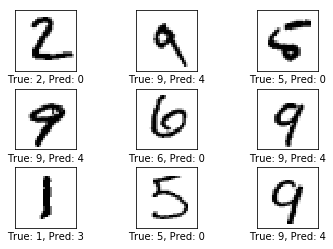

In [2]:
optimize(num_iterations=1)
print_accuracy()
plot_example_errors()

Accuracy on test-set: 87.1%


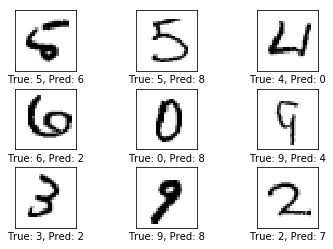

In [3]:
optimize(num_iterations=50)
print_accuracy()
plot_example_errors()

Accuracy on test-set: 90.0%


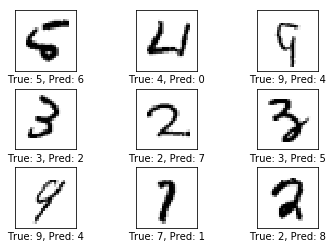

In [4]:
optimize(num_iterations=100)
print_accuracy()
plot_example_errors()

Accuracy on test-set: 91.6%


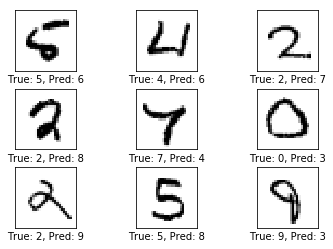

In [5]:
optimize(num_iterations=500)
print_accuracy()
plot_example_errors()

Accuracy on test-set: 92.3%


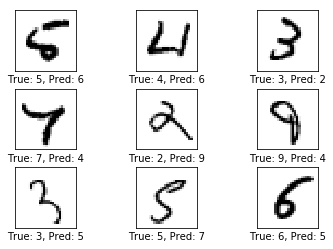

In [6]:
optimize(num_iterations=1000)
print_accuracy()
plot_example_errors()

Accuracy on test-set: 92.1%


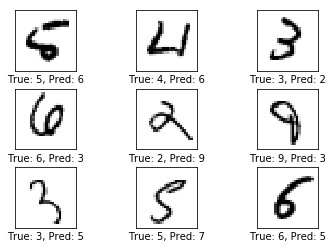

In [7]:
optimize(num_iterations=10000)
print_accuracy()
plot_example_errors()